# ***SMS SPAM Filter with Natural Language Processing !***

I've built a spam filter using Natural Language Processing (NLP) in Python, particularly using the nltk library for text preprocessing and a Naive Bayes classifier for training. The code seems well-organized and includes steps for data analysis, feature extraction, text preprocessing, vectorization, and model training.

 It's common to evaluate the performance of the model using metrics like accuracy, precision, recall, and F1-score. You can use these metrics to assess how well your model is performing on the training data.

# **Section I Data Analysis**

# **Step 1**

Import necessary libraries

In [109]:
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import string
import seaborn as sns

Read the dataset

In [110]:
# Load the dataset with a different encoding
data = pd.read_csv('spam.csv', encoding='latin1')
# Display the first few rows of the dataset
print(data.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

This gives us information about columns

In [111]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


This gives us a general Idea about the Dataset

In [112]:
data.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

This shows us how many Spam vd Normal Messages we have in the Dataset we have about 747 apam messages and 4825 messages which are not spam and 4516 is uniqe messages from there.

# **Step 2**

Lets us extract some Features as well

In [113]:
data["Length"] = data["v2"].apply(len)

In [114]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


This will help our model to have more features so it can predict based on length of messages

<ipython-input-115-ae892d7012be>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Length', ylabel='Density'>

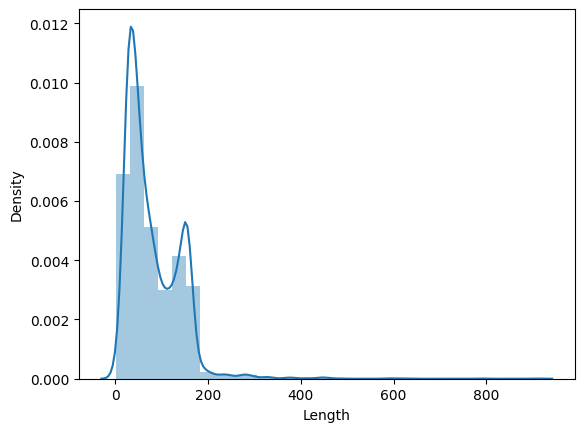

In [115]:
sns.distplot(data["Length"], bins=30)

This tell us distribtion of length(v1) of messages.

# **Questions**
what is Maximum Length of Message some one sent and what is that message

In [116]:
data["Length"].max()

910

In [117]:
data[data["Length"]==910]["v2"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Conclusion: The Maximum Length of message is 910 and it seems to be a love letter Lol !

what is Mininum Length of Message some one sent and what is that message

In [118]:
data[data["Length"] == data["Length"].min()]["v2"].iloc[0]

'Ok'

Conclusion: The Mininum Length of message is 2 and it seems to be just OK

In [119]:
data.head(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111


<Axes: xlabel='v1', ylabel='Length'>

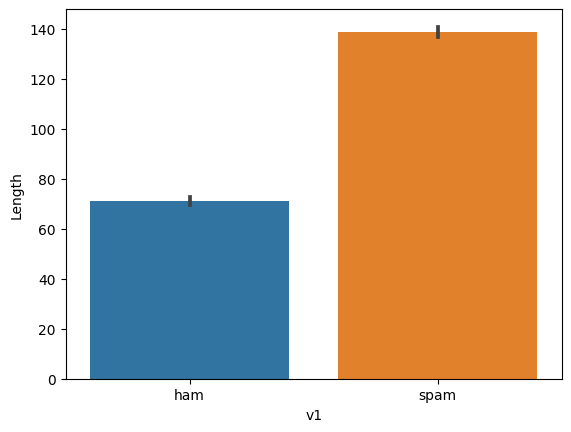

In [120]:
sns.barplot(x='v1', y='Length', data=data)

In [121]:
import plotly.express as px

fig = px.histogram(data, x='Length', color='v1', nbins=100)
fig.show()

# **Section II** **Remove Punctuation from message**

# Small Library to Pre Process Text Data


In [122]:
class PreProcessText(object):
    def __init__(self):
        pass

    def __remove_punctuation(self, text):
        """
        Takes a String
        return : Return a String
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)

        return message

    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words


    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to
        Train the Model
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words


In [123]:
pip install nltk


In [124]:
import nltk

# Download the required resource
nltk.download('punkt')

class PreProcessText:
    def token_words(self, text):
        words = nltk.word_tokenize(text)
        return words

# Sample message
mess = 'Sample message! Notice: it has punctuation.'

# Instantiate PreProcessText class
obj = PreProcessText()

# Tokenize words
words = obj.token_words(mess)

# Print the result
print(words)



['Sample', 'message', '!', 'Notice', ':', 'it', 'has', 'punctuation', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


we have converted our string into Token for the Model

In [125]:
data["v2"].head(4).apply(obj.token_words)

0    [Go, until, jurong, point, ,, crazy, .., Avail...
1             [Ok, lar, ..., Joking, wif, u, oni, ...]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, ..., U, c, alrea...
Name: v2, dtype: object

Vectorization

In [126]:
bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(data["v2"])

In [127]:
messages_bow = bow_transformer.transform(data["v2"])

In [128]:
print("Shape of sparese matrix {}".format(messages_bow.shape))

Shape of sparese matrix (5572, 11520)


Formula to check Sparsity

In [129]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.14253434832894632


Converted word count into TFIDF think this a weight

In [130]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [131]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

Train the Model

In [132]:
from sklearn.naive_bayes import MultinomialNB

In [133]:
model = MultinomialNB().fit(messages_tfidf,data["v1"])

Prediction

In [134]:
all_predictions = model.predict(messages_tfidf)
pred = pd.DataFrame(data=all_predictions)
# Display first 6 predictions
pred.head(6)

,0
0,ham
1,ham
2,spam
3,ham
4,ham
5,ham


True Value

In [135]:
# Display first 6 true values
data["v1"].head(6)

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
Name: v1, dtype: object